# Load Data

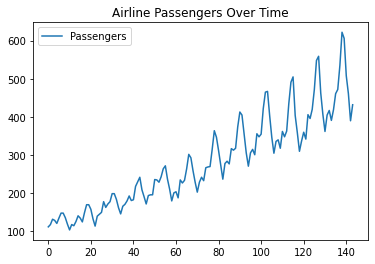

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# from sktime.datasets import load_airline

original_y = pd.read_csv('Airline.csv')
original_y
original_y.plot(title='Airline Passengers Over Time')
plt.show()

# Create Missing Data

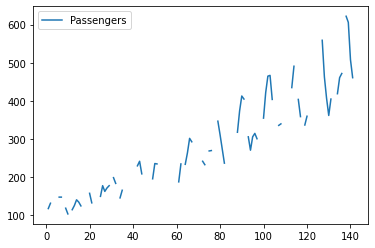

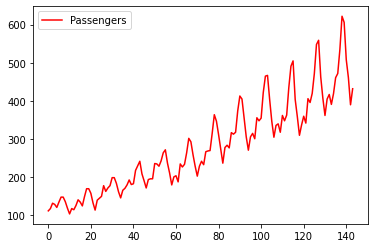

In [32]:
import random
random.seed(10)
index_holes = random.sample(original_y.index.tolist(), int(len(original_y)*.4) )
y = original_y.copy()
y.loc[index_holes] = None

y.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [33]:
compare = pd.concat([original_y, y], axis=1)
compare.columns=['Original', 'MissingValues']
compare.head(10)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

# 1. Forward Fill

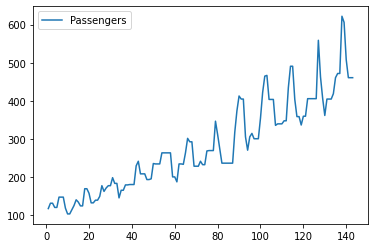

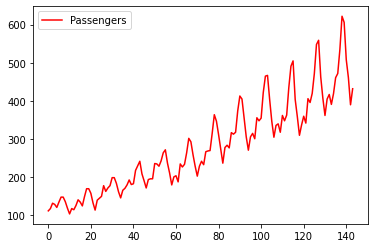

In [34]:
y_ff =y.fillna(method='ffill')
y_ff.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [35]:
compare = pd.concat([compare, y_ff], axis=1)
compare=compare.rename(columns={'Number of airline passengers': 'ForwardFill'})
compare.head(10)

,Date,Passengers,Date,Passengers,Date,Passengers
0,1949-01,112,None,NaN,None,NaN
1,1949-02,118,1949-02,118.0,1949-02,118.0
2,1949-03,132,1949-03,132.0,1949-03,132.0
3,1949-04,129,None,NaN,1949-03,132.0
4,1949-05,121,1949-05,121.0,1949-05,121.0
5,1949-06,135,None,NaN,1949-05,121.0
6,1949-07,148,1949-07,148.0,1949-07,148.0
7,1949-08,148,1949-08,148.0,1949-08,148.0
8,1949-09,136,None,NaN,1949-08,148.0
9,1949-10,119,1949-10,119.0,1949-10,119.0


# 2. Backward Fill

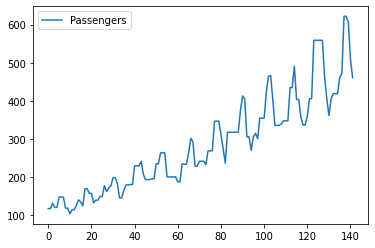

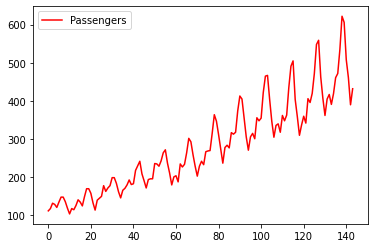

In [36]:
y_bf = y.fillna(method='bfill')
y_bf.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [37]:
compare = pd.concat([compare, y_bf], axis=1)
compare=compare.rename(columns={'Number of airline passengers': 'BackwardFill'})
compare.head(10)

,Date,Passengers,Date,Passengers,Date,Passengers,Date,Passengers
0,1949-01,112,None,NaN,None,NaN,1949-02,118.0
1,1949-02,118,1949-02,118.0,1949-02,118.0,1949-02,118.0
2,1949-03,132,1949-03,132.0,1949-03,132.0,1949-03,132.0
3,1949-04,129,None,NaN,1949-03,132.0,1949-05,121.0
4,1949-05,121,1949-05,121.0,1949-05,121.0,1949-05,121.0
5,1949-06,135,None,NaN,1949-05,121.0,1949-07,148.0
6,1949-07,148,1949-07,148.0,1949-07,148.0,1949-07,148.0
7,1949-08,148,1949-08,148.0,1949-08,148.0,1949-08,148.0
8,1949-09,136,None,NaN,1949-08,148.0,1949-10,119.0
9,1949-10,119,1949-10,119.0,1949-10,119.0,1949-10,119.0


# 3. Moving Average Fill

In [64]:
import numpy as np
import pandas as pd

def apply_mean_imputer(x, period):
    
    if not isinstance(x, pd.Series):
        x=pd.Series(x['Passengers'])
    
    results = []
    for i in range(1, len(x)+1):
        slice_of_x = x.iloc[ max(0, i-period) :i]
        mean_of_x = slice_of_x.mean()
        results.append(mean_of_x)
    
    missing_results = pd.Series(results, index=x.index)
    missing_results = np.where(x.isnull(), missing_results, x )
    missing_results = pd.Series(missing_results, index=x.index)
    return missing_results

In [65]:
imputed_y = apply_mean_imputer(y, 5)

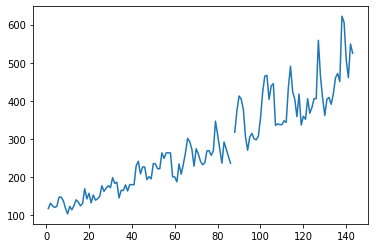

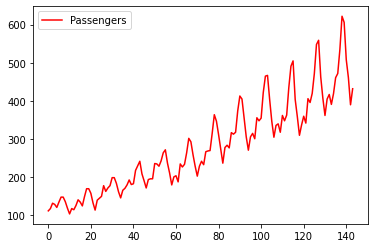

In [66]:
imputed_y.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [51]:
compare = pd.concat([compare, imputed_y], axis=1)
compare=compare.rename(columns={0:'MeanFill'})
compare['MeanFill']=compare['MeanFill'].round()
compare.head(10)

,Date,Passengers,Date,Passengers,Date,Passengers,Date,Passengers,MeanFill
0,1949-01,112,None,NaN,None,NaN,1949-02,118.0,NaN
1,1949-02,118,1949-02,118.0,1949-02,118.0,1949-02,118.0,118.0
2,1949-03,132,1949-03,132.0,1949-03,132.0,1949-03,132.0,132.0
3,1949-04,129,None,NaN,1949-03,132.0,1949-05,121.0,125.0
4,1949-05,121,1949-05,121.0,1949-05,121.0,1949-05,121.0,121.0
5,1949-06,135,None,NaN,1949-05,121.0,1949-07,148.0,124.0
6,1949-07,148,1949-07,148.0,1949-07,148.0,1949-07,148.0,148.0
7,1949-08,148,1949-08,148.0,1949-08,148.0,1949-08,148.0,148.0
8,1949-09,136,None,NaN,1949-08,148.0,1949-10,119.0,139.0
9,1949-10,119,1949-10,119.0,1949-10,119.0,1949-10,119.0,119.0


# 4. Interpolation

Interpolation must be careful for backtesting because it uses future values in order to fill missing data. If you are attempting to predict a stock price and you have missing data, you could know the future result therefore, your model would predict better in backtests than in real results

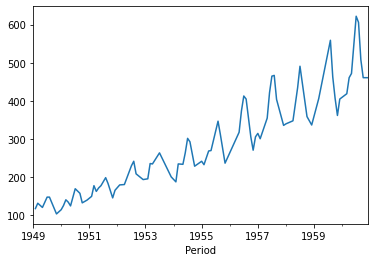

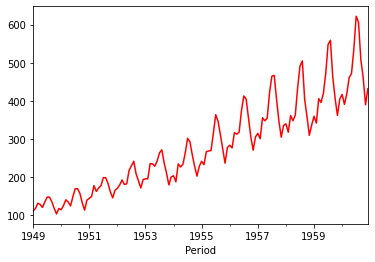

In [12]:
y_int = y.interpolate()
y_int.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [13]:
compare = pd.concat([compare, y_int], axis=1)
compare=compare.rename(columns={'Number of airline passengers':'InterpolateFill'})
compare.head(10)

,Original,MissingValues,ForwardFill,BackwardFill,MeanFill,InterpolateFill
Period,,,,,,
1949-01,112.0,NaN,NaN,118.0,NaN,NaN
1949-02,118.0,118.0,118.0,118.0,118.0,118.0
1949-03,132.0,132.0,132.0,132.0,132.0,132.0
1949-04,129.0,NaN,132.0,121.0,125.0,126.5
1949-05,121.0,121.0,121.0,121.0,121.0,121.0
1949-06,135.0,NaN,121.0,148.0,124.0,134.5
1949-07,148.0,148.0,148.0,148.0,148.0,148.0
1949-08,148.0,148.0,148.0,148.0,148.0,148.0
1949-09,136.0,NaN,148.0,119.0,139.0,133.5


# 5. Data fill from alternate series

In [14]:
random_mismatch_data = original_y.apply(lambda x: x+random.randint(-200,200) )

In [15]:
random_mismatch_data.head()

Period
1949-01    -55.0
1949-02    252.0
1949-03    231.0
1949-04     95.0
1949-05    177.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [16]:
combined_data = pd.concat(
    [pd.DataFrame(y), pd.DataFrame(random_mismatch_data)],
    axis=1
)

In [17]:
combined_data.head()

,Number of airline passengers,Number of airline passengers
Period,,
1949-01,NaN,-55.0
1949-02,118.0,252.0
1949-03,132.0,231.0
1949-04,NaN,95.0
1949-05,121.0,177.0


Fill data From right to left

In [22]:
datafill_y = combined_data.fillna(method='bfill', axis=1).iloc[:,0]

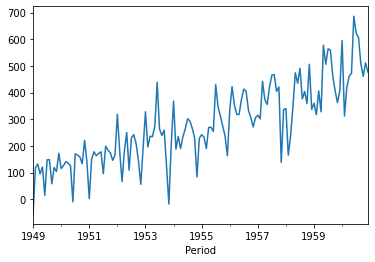

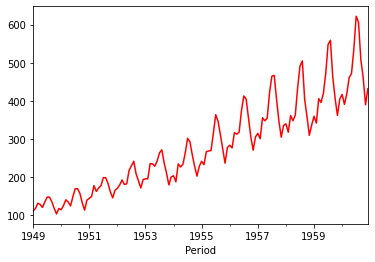

In [23]:
datafill_y.plot()
plt.show()
original_y.plot(color='red')
plt.show()

In [25]:
compare = pd.concat([compare, datafill_y], axis=1)
compare=compare.rename(columns={'Number of airline passengers':'DataFill'})
compare.head(10)

,Original,MissingValues,ForwardFill,BackwardFill,MeanFill,InterpolateFill,DataFill,DataFill
Period,,,,,,,,
1949-01,112.0,NaN,NaN,118.0,NaN,NaN,-55.0,-55.0
1949-02,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0
1949-03,132.0,132.0,132.0,132.0,132.0,132.0,132.0,132.0
1949-04,129.0,NaN,132.0,121.0,125.0,126.5,95.0,95.0
1949-05,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
1949-06,135.0,NaN,121.0,148.0,124.0,134.5,15.0,15.0
1949-07,148.0,148.0,148.0,148.0,148.0,148.0,148.0,148.0
1949-08,148.0,148.0,148.0,148.0,148.0,148.0,148.0,148.0
1949-09,136.0,NaN,148.0,119.0,139.0,133.5,58.0,58.0
